  
<div class="alert alert-info">
<h1><center><font color=darkblue> PowerTransformer, QuantileTransformer and Scalers<font></center></h1>

</div>

- The dataset that I was working on was: Prediction of Math score of students in 3rd Semester (G3)
- The scaling score for modeling: RMSE

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings   
warnings.filterwarnings('ignore')

import scipy.stats as stats

import datetime
d= datetime.datetime.now()
d.strftime('%Y-%m-%d %H:%M:%S')

'2022-07-12 16:08:33'

In [2]:
df = pd.read_csv(r'http://dataqueez.ir/files/questions/train(3).csv') #train dataset (main)
df_test = pd.read_csv(r'http://dataqueez.ir/files/questions/test(3).csv') #test dataset (not involved G3)

df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     LE3       A     4     4   health     other  ...   
1     MS   F   18       R     LE3       T     4     4  teacher  services  ...   
2     GP   M   19       U     GT3       T     3     3    other     other  ...   
3     GP   F   16       U     GT3       T     3     3    other  services  ...   
4     GP   F   17       U     GT3       T     3     2    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        2      4     1     1      4       14  12  10  11  
1      5        4      3     3     4      2        4   8   9  10  
2      4        4      4     1     1      3       20  15  14  13  
3      4        3      3     2     4      5       54  11  12  11  
4      4        3      2     2     3      2        0   7   8   0  

[5 rows x 33 columns]

## Note: All Pre-processing steps should be on Train data! , X and Not Y


# <font color=Red>Simple EDA:<font>

In [3]:
# to get info of our dataset
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Very beautiful Histogram by Plotly.express
import plotly.express as px
px.histogram(df, x="G2", y="age", color="sex", facet_col="school", height=500) #color:→ legend

In [ ]:
px.bar(df, x="age", y="G2", color="sex",hover_name="address", facet_col="school", height=500)

In [5]:
#scatter plot by 3 variables!!!!

import plotly.express as px

fig = px.scatter(df, x="age", y="G1", color="sex",size= df.G2, title="Age vs. G1" ) #color→ legend
fig.show()

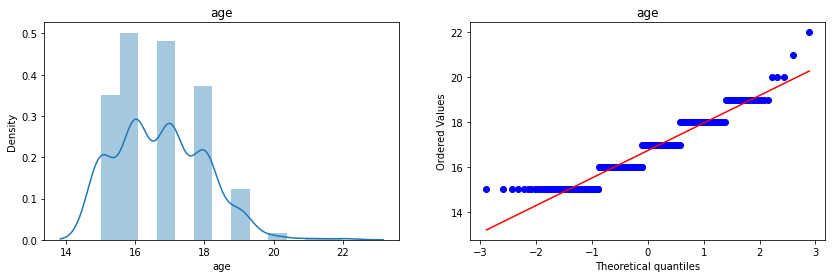

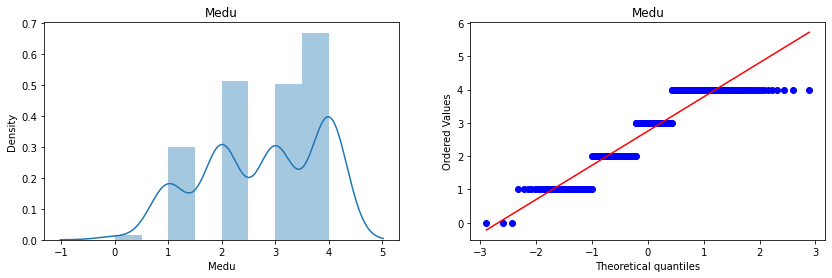

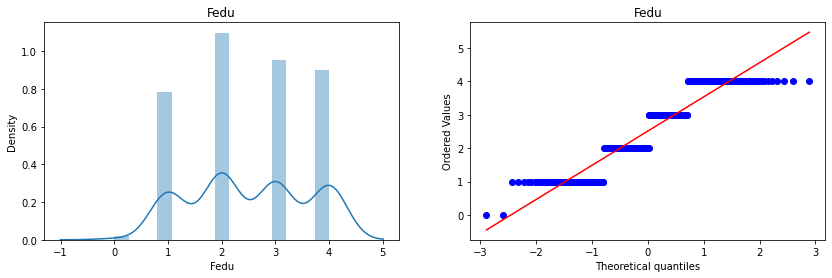

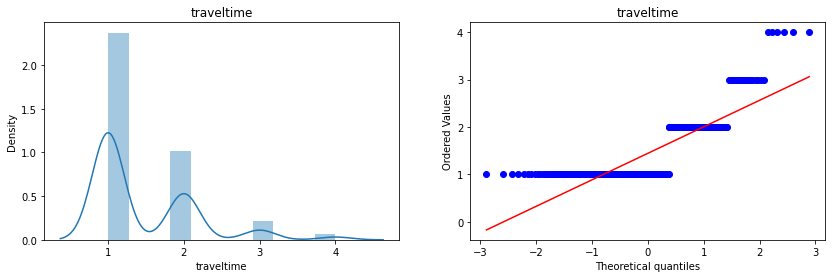

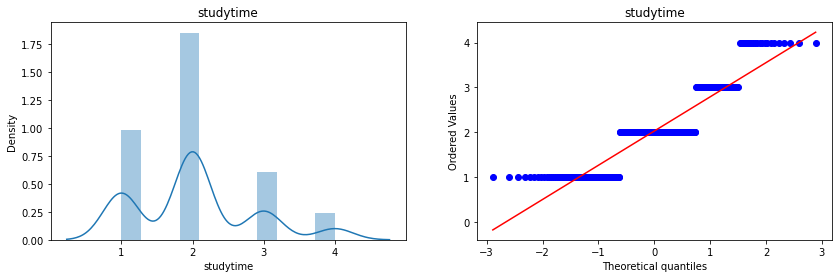

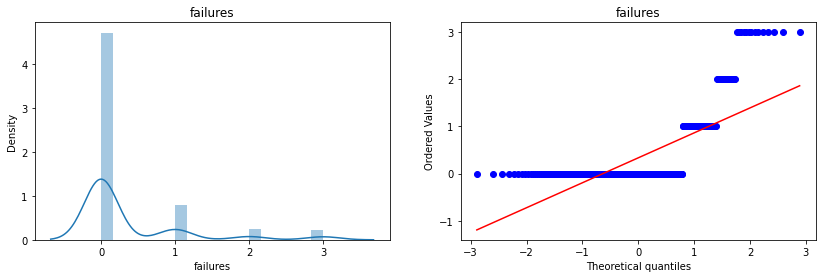

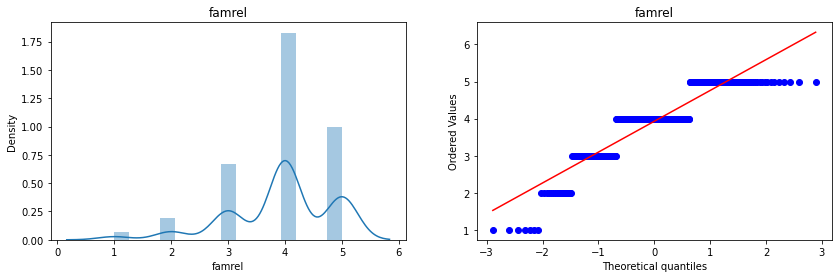

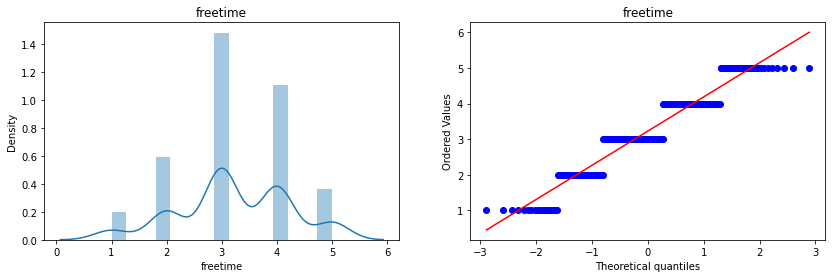

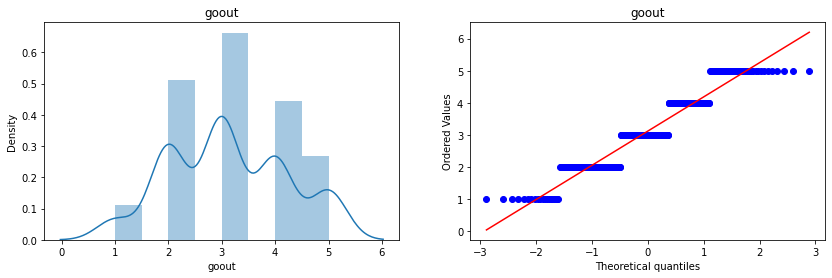

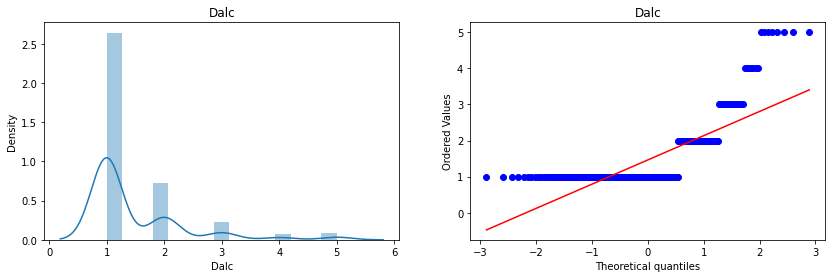

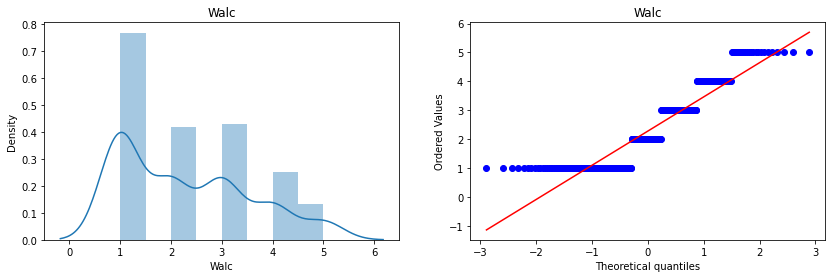

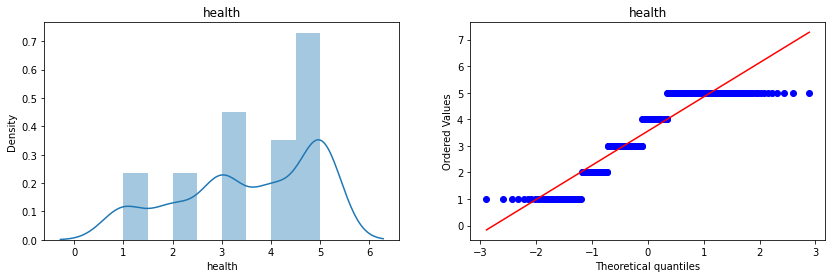

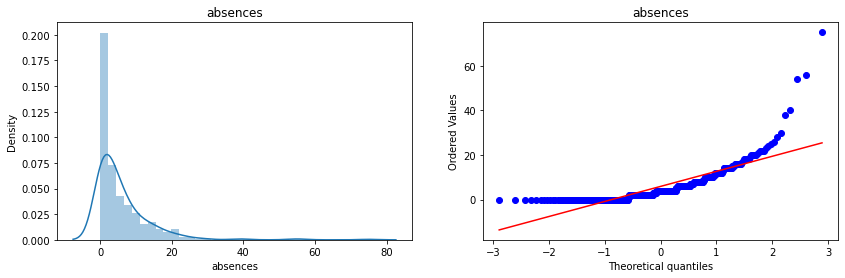

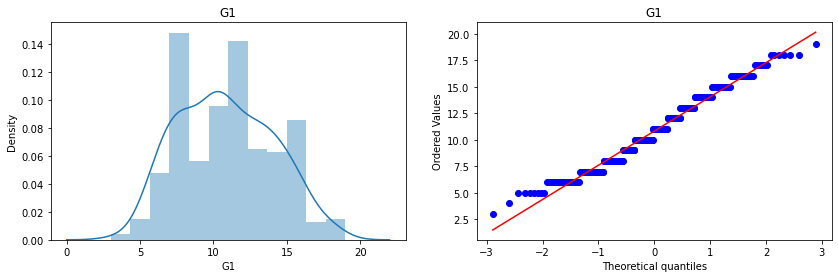

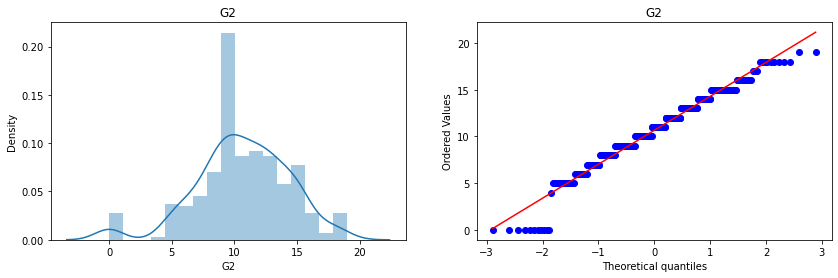

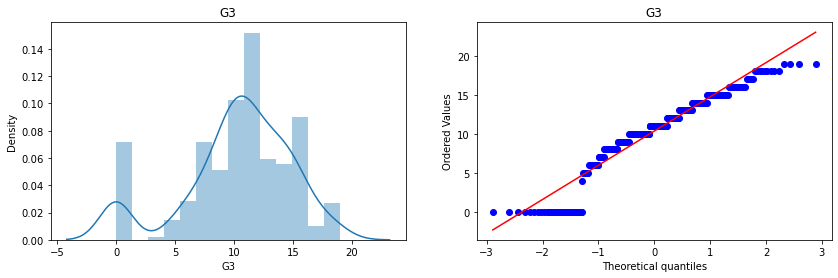

In [6]:
#a) qq plot and histogram

cols = df.columns
for c in cols:
    if df[c].dtypes!='object':
        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.distplot(df[c])
        plt.title(c)

        plt.subplot(122)
        stats.probplot(df[c], dist="norm", plot=plt)
        plt.title(c)

        plt.show()

In [7]:
#G2

#b) Shapiro test  if P-Value> 0.05 → normal

from scipy.stats import shapiro
shapiro(df['G2'])

#so P> 0.05 → G2 is normal

ShapiroResult(statistic=0.9693135619163513, pvalue=7.065137879180838e-07)

In [8]:
#age

#b) Shapiro test

from scipy.stats import shapiro
shapiro(df['age'])

#so P< 0.05 → age is Not Normal

ShapiroResult(statistic=0.9143446683883667, pvalue=2.0322254350255836e-13)

# <font color=red>Normalizing a dataset by Power Transformers<font>
    - The PowerTransformer can then be used to automatically remove the skew from the data.
    - Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

## We can use the boxcox() function to find an optimal value of lambda that produces a more normal distribution:

In [4]:
#only numerical features

df1= df.select_dtypes(include='number')
df1.head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           1          2         0       4         2      4   
1   18     4     4           1          2         0       5         4      3   
2   19     3     3           1          2         1       4         4      4   
3   16     3     3           1          2         0       4         3      3   
4   17     3     2           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       4        14  12  10  11  
1     3     4       2         4   8   9  10  
2     1     1       3        20  15  14  13  
3     2     4       5        54  11  12  11  
4     2     3       2         0   7   8   0

### There are two popular approaches for such automatic power transforms:
- Box-Cox Transform
- Yeo-Johnson Transform

- ambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [5]:
#1) BOX Cox:

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

df1_transformed = pt.fit_transform(df1+0.000001)


pd.DataFrame({'cols':df1.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0          age        -1.710573
1         Medu         0.808346
2         Fedu         0.678633
3   traveltime        -2.360501
4    studytime         0.243952
5     failures        -0.311482
6       famrel         2.063040
7     freetime         1.147645
8        goout         0.771295
9         Dalc        -2.969864
10        Walc        -0.078332
11      health         1.328967
12    absences         0.162118
13          G1         0.619116
14          G2         0.745357
15          G3         0.510225

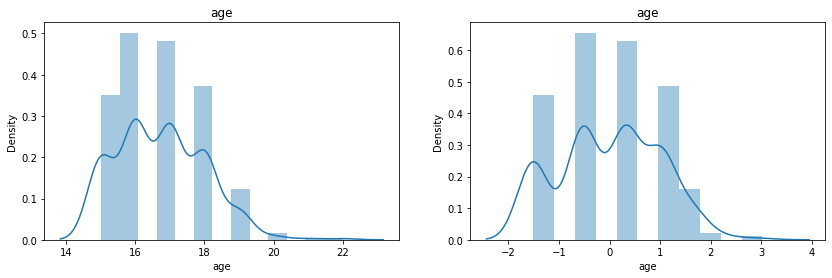

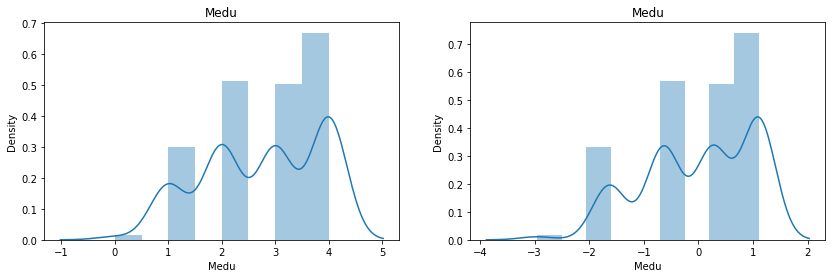

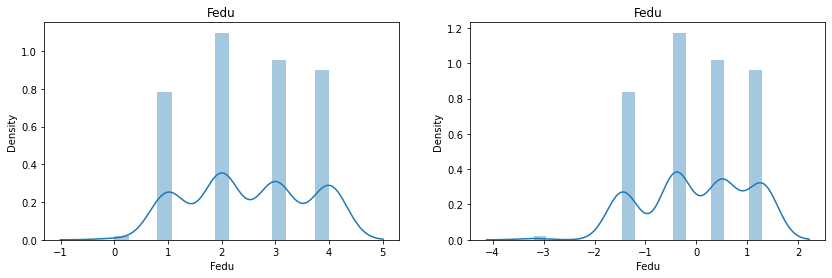

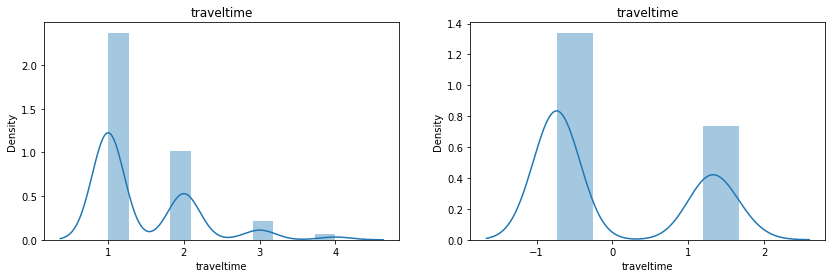

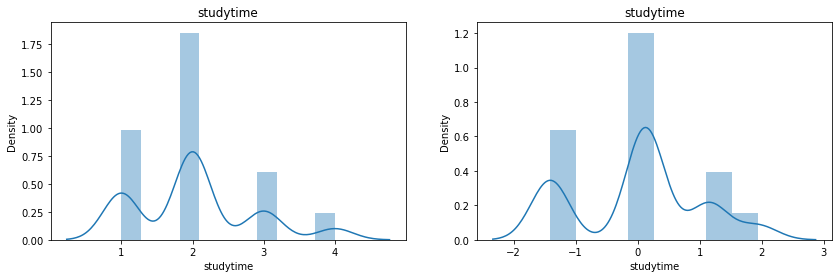

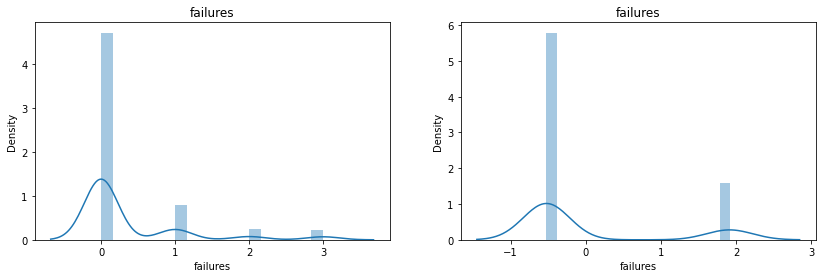

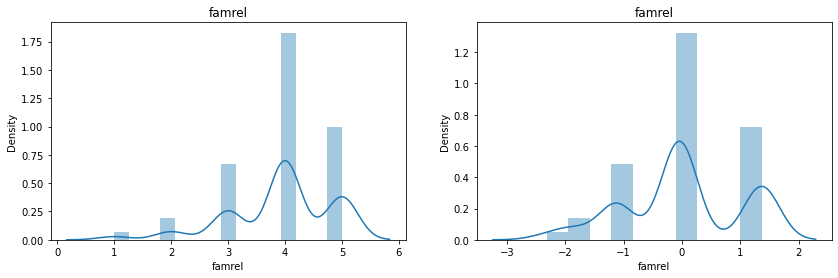

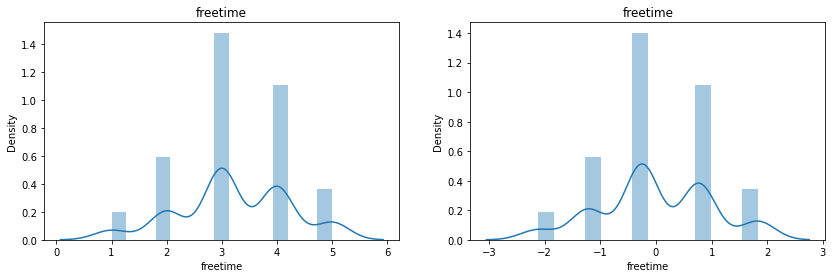

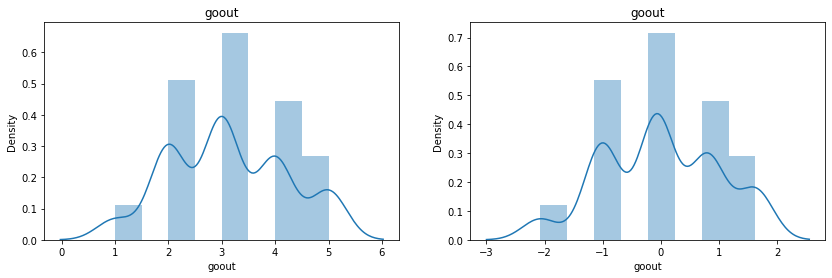

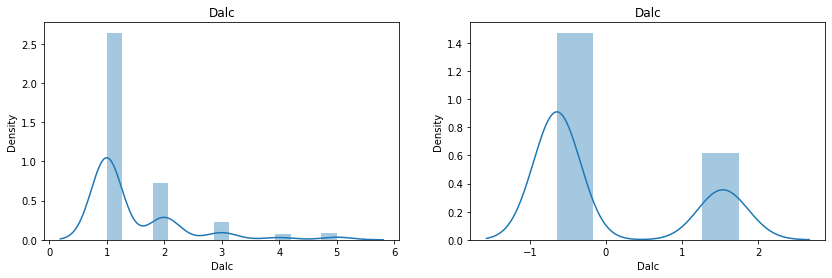

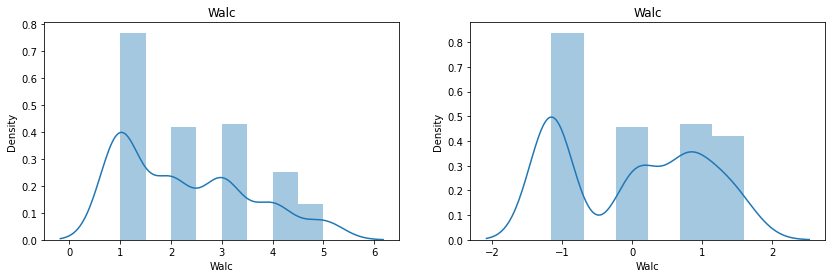

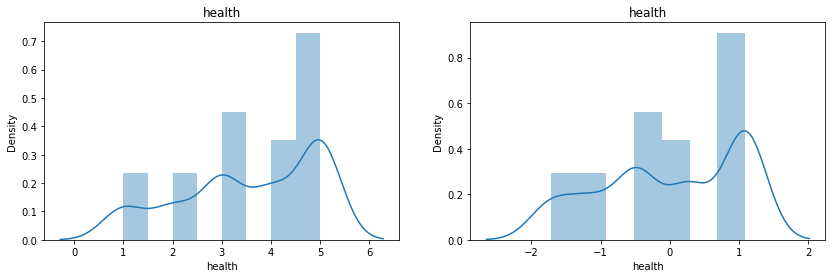

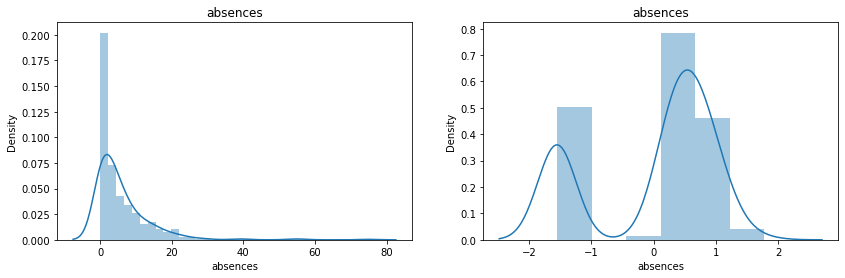

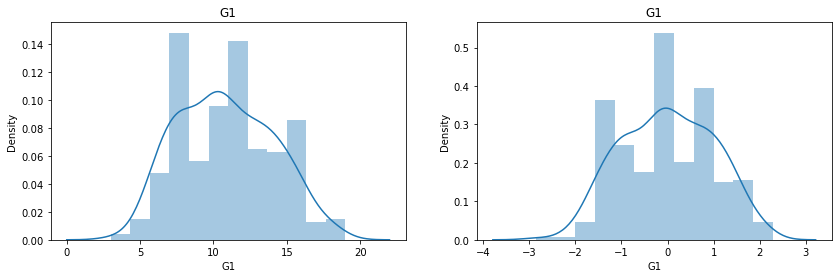

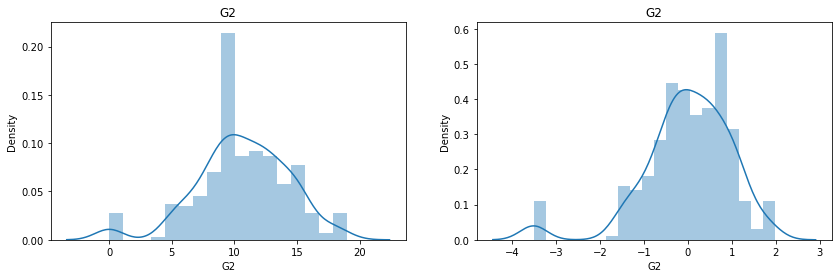

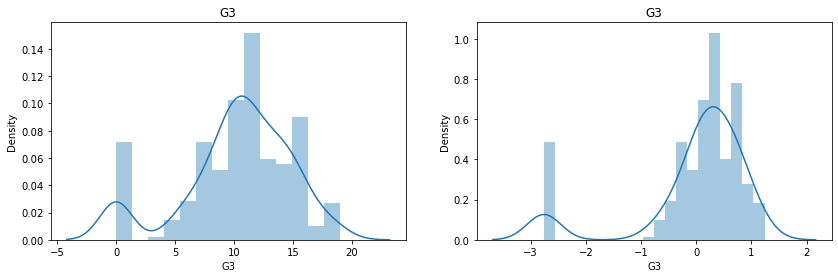

In [6]:
# Before and after normalization by Box-Cox Plot
df1_transformed = pd.DataFrame(df1_transformed,columns=df1.columns)

for col in df1_transformed.columns:
#before
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(col)
#after
    plt.subplot(122)
    sns.distplot(df1_transformed[col])
    plt.title(col)


In [8]:
#2) By Yeo-Johnson:

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df2_transformed = pt.fit_transform(df1+0.000001)


pd.DataFrame({'cols':df1.columns,'yeo-johnson_lambdas':pt.lambdas_})

cols  yeo-johnson_lambdas
0          age            -1.863494
1         Medu             1.353365
2         Fedu             0.814771
3   traveltime            -3.921168
4    studytime            -0.077731
5     failures            -4.753790
6       famrel             2.464709
7     freetime             1.239319
8        goout             0.720685
9         Dalc            -4.740847
10        Walc            -0.401898
11      health             1.610827
12    absences            -0.022591
13          G1             0.589250
14          G2             1.286282
15          G3             1.306273

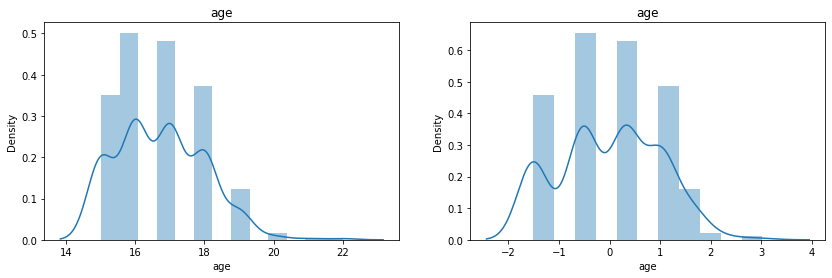

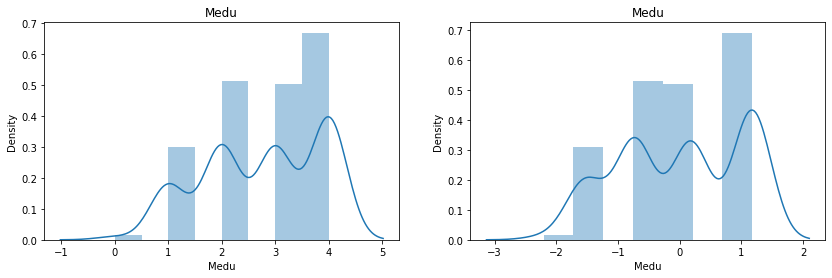

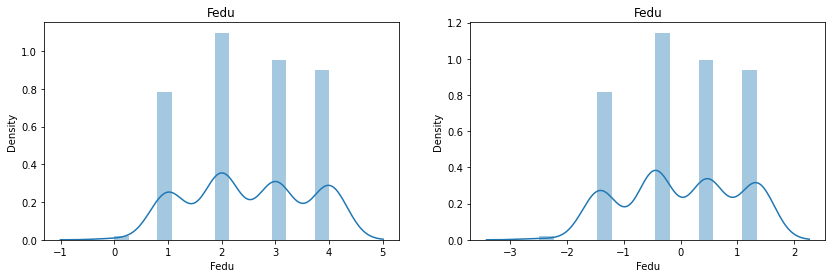

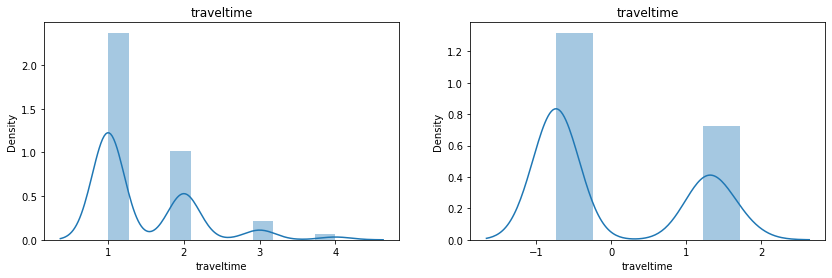

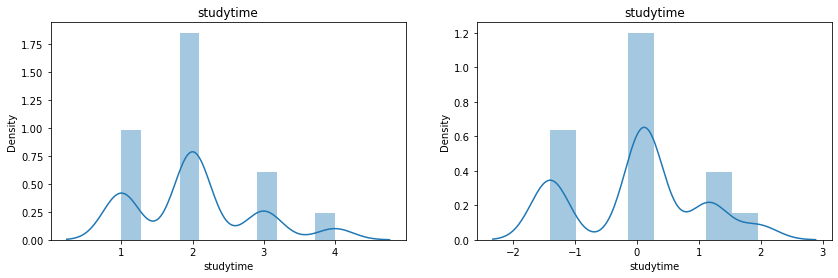

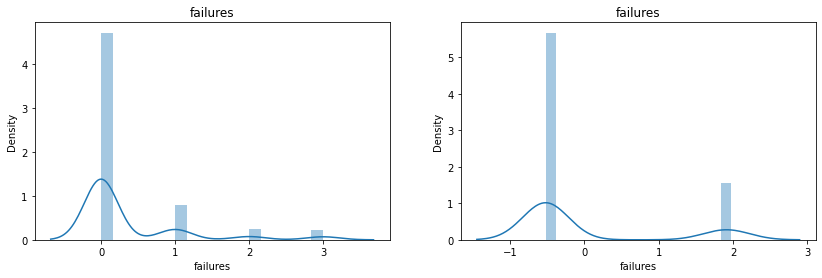

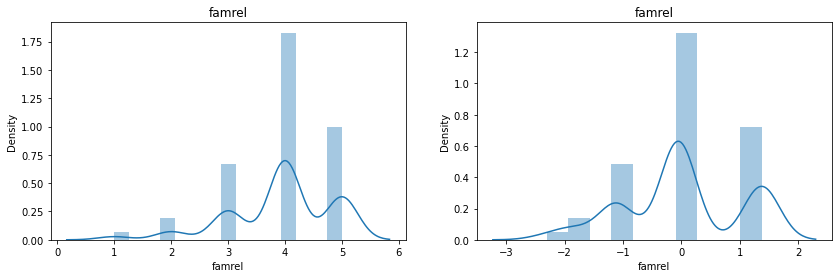

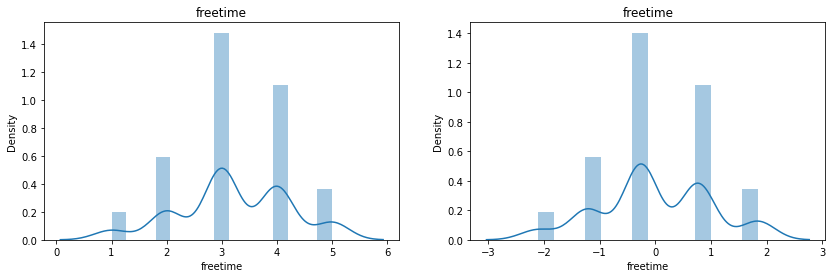

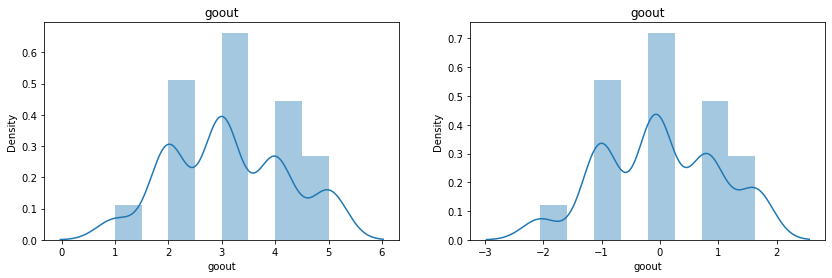

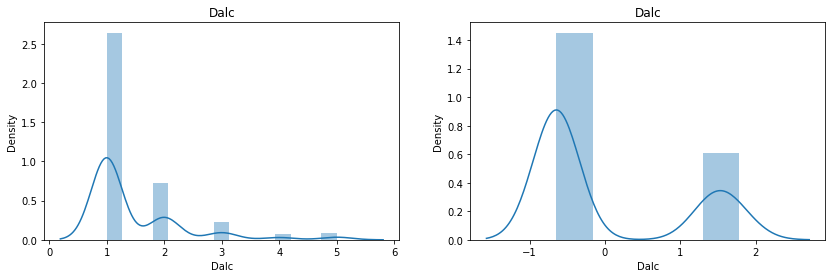

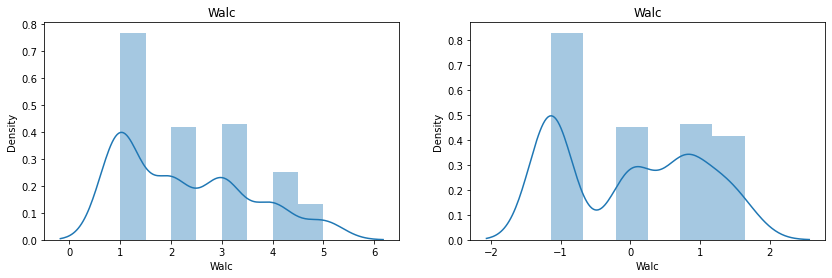

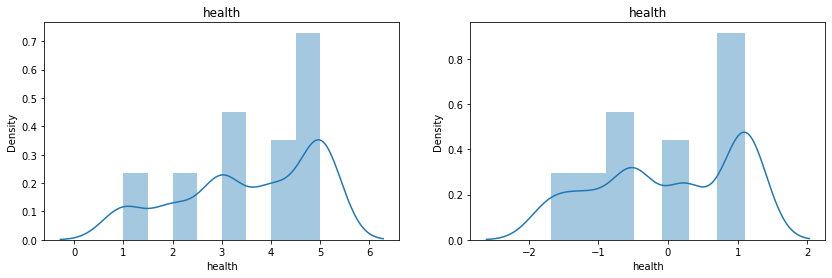

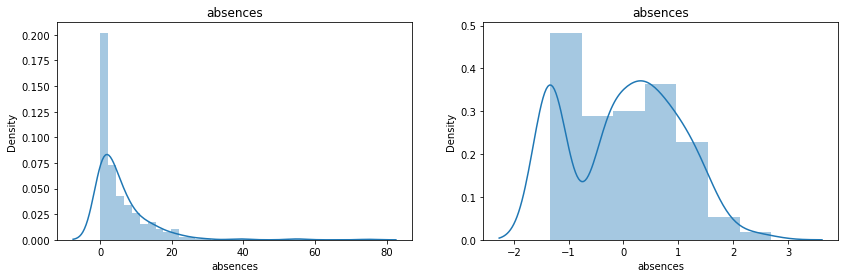

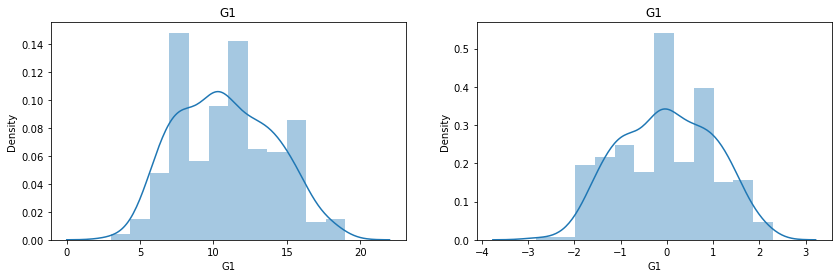

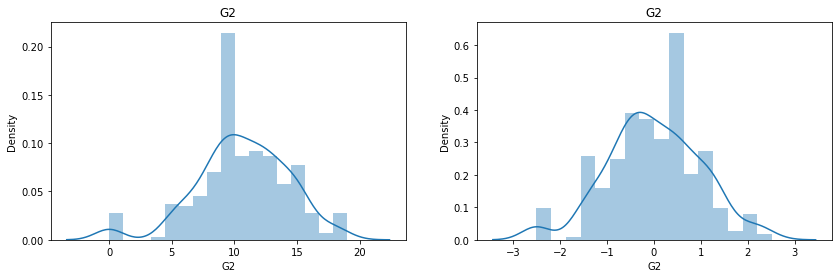

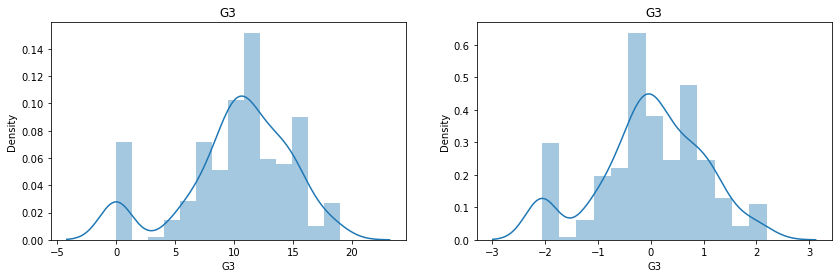

In [9]:
# Before and after normalization by Yeo-Johnson:
df2_transformed = pd.DataFrame(df2_transformed,columns=df1.columns)

for col in df2_transformed.columns:
#before
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(col)
#after
    plt.subplot(122)
    sns.distplot(df2_transformed[col])
    plt.title(col)

    plt.show()

# <font color=red>Normalizing a dataset by "Quantile Transformers" besides PowerTransformer<font>

In [16]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
dfq_transformed = quantile.fit_transform(df1)
pd.DataFrame(data=dfq_transformed, columns= df1.columns).head()

age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  0.914727  5.199338  5.199338   -5.199338   0.049032 -5.199338 -0.021007   
1  0.914727  5.199338  5.199338   -5.199338   0.049032 -5.199338  5.199338   
2  1.684015  0.101700  0.342674   -5.199338   0.049032  1.050918 -0.021007   
3 -0.456480  0.101700  0.342674   -5.199338   0.049032 -5.199338 -0.021007   
4  0.225964  0.101700 -0.361297   -5.199338   0.049032 -5.199338 -0.021007   

   freetime     goout      Dalc      Walc    health  absences        G1  \
0 -1.120338  0.692176 -5.199338 -5.199338  0.119312  1.202809  0.350109   
1  0.692176 -0.059550  1.466698  1.133550 -0.930803  0.094665 -0.732789   
2  0.692176  0.692176 -5.199338 -5.199338 -0.391361  1.684015  1.188499   
3 -0.233153 -0.059550  0.842619  1.133550  5.199338  2.537235  0.101700   
4 -0.233153 -0.909420  0.842619  0.527617 -0.930803 -5.199338 -1.100878   

         G2        G3  
0 -0.193754  0.070075  
1 -0.515584 -0.265658  
2  0.888445  0.560089  
3  0.331557  0.070075  
4 -0.832675 -5.199338

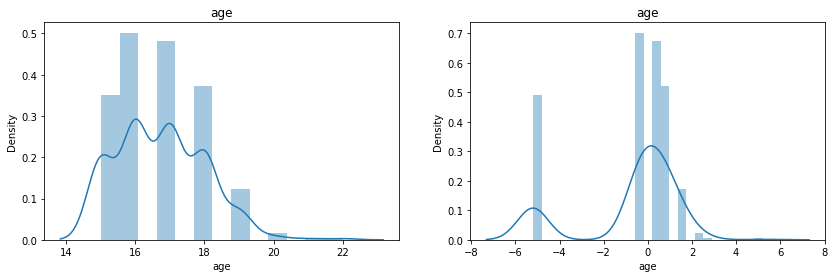

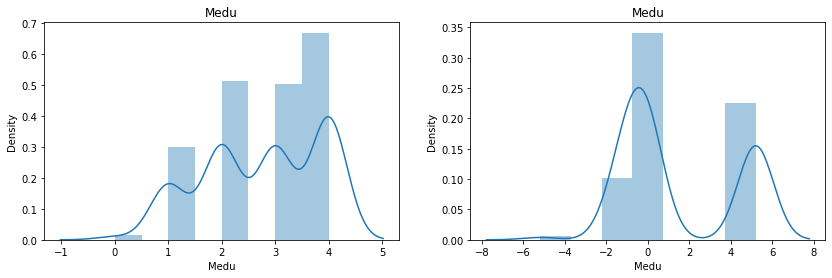

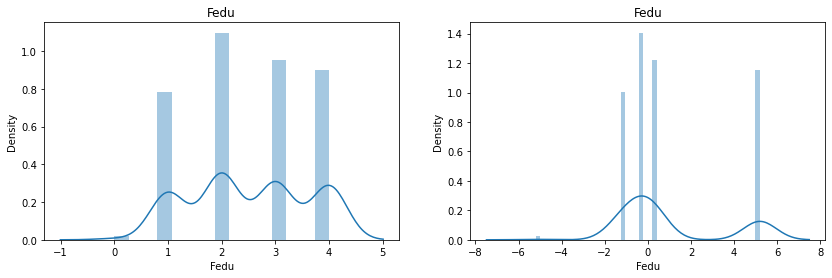

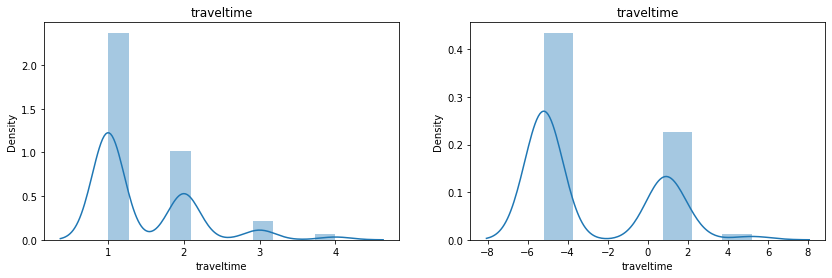

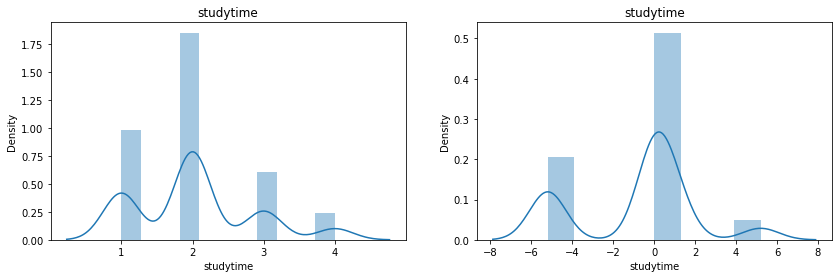

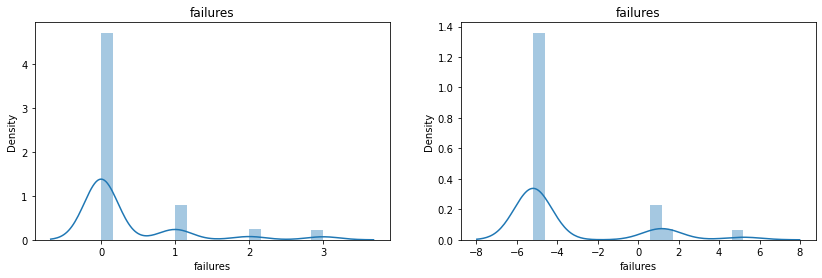

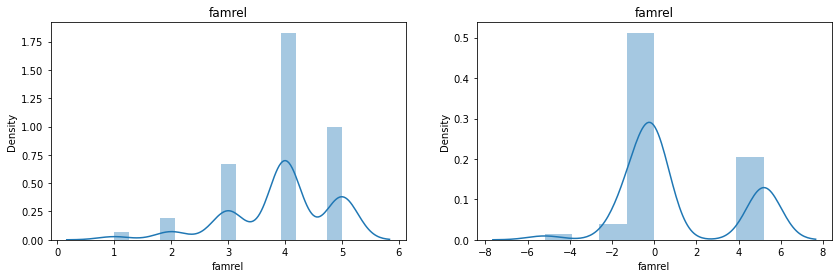

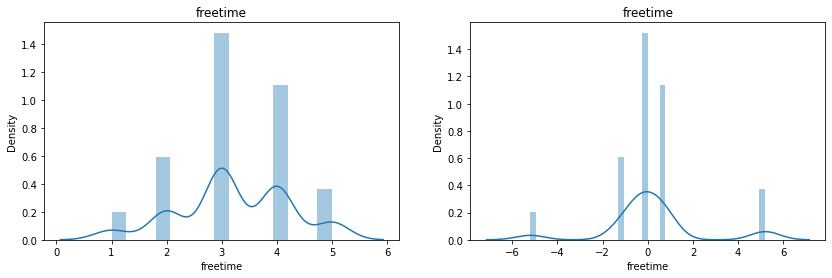

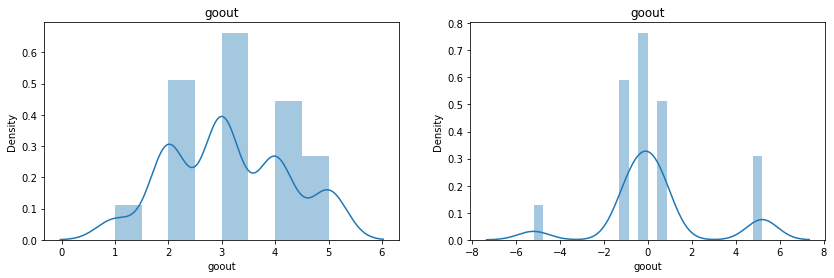

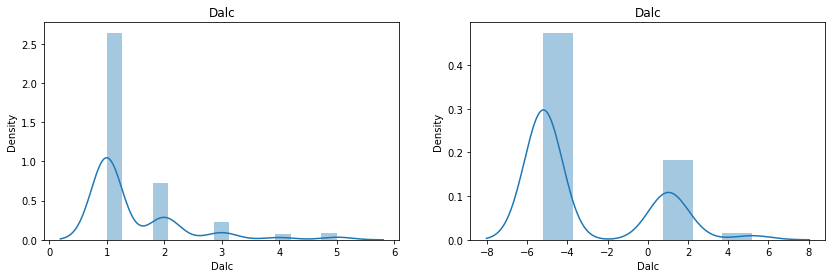

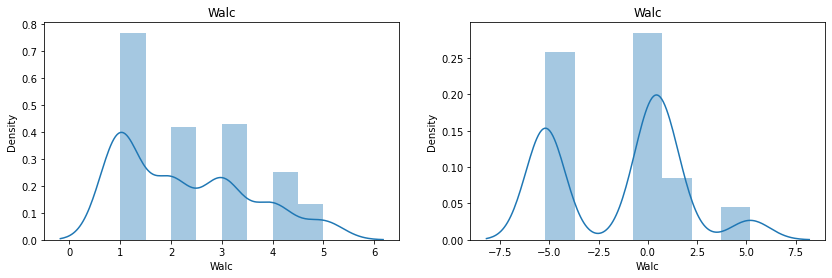

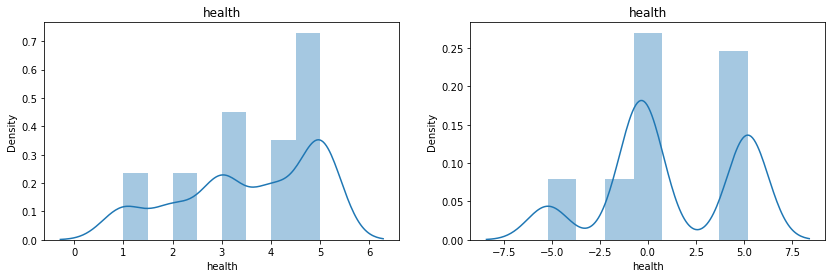

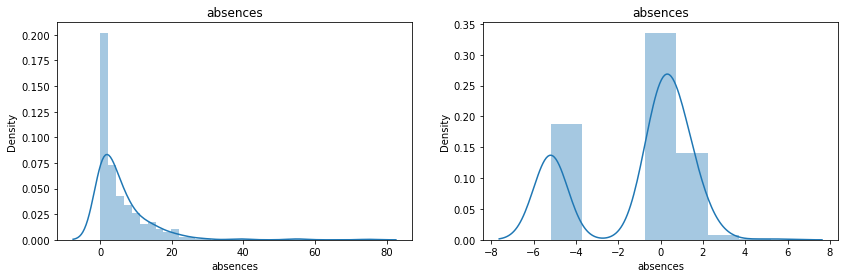

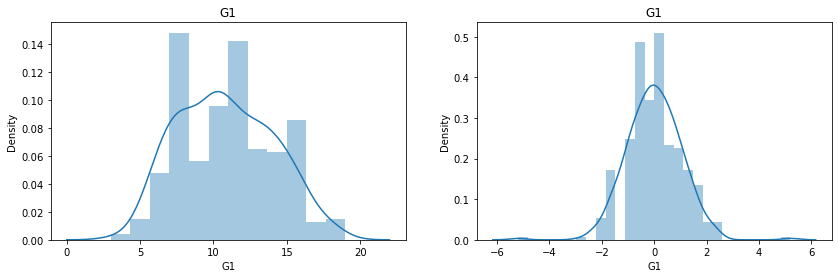

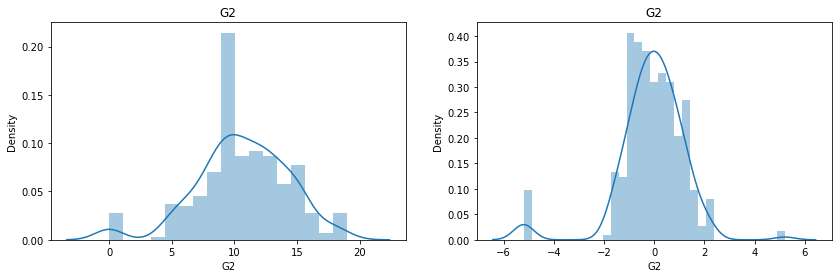

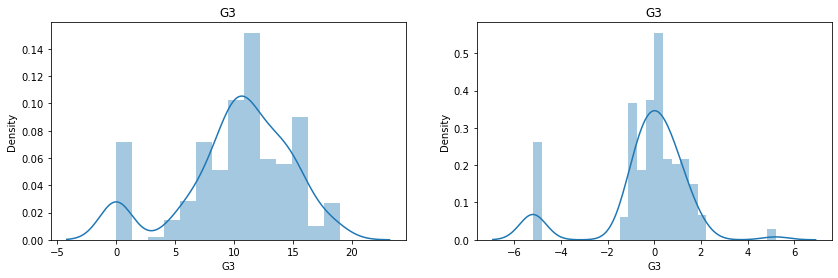

In [17]:
# Before and after normalization by Quantile Transformers:
dfq_transformed = pd.DataFrame(dfq_transformed,columns=df1.columns)

for col in dfq_transformed.columns:
#before
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[col])
    plt.title(col)
#after
    plt.subplot(122)
    sns.distplot(dfq_transformed[col])
    plt.title(col)

    plt.show()

### It sounds way better thab PowerTransformer

In [36]:
#*) → The algorithms know only numbers: So we have to label encoder the columns (:= plural→ for loop) that are not numbers
from sklearn.preprocessing import LabelEncoder  
LE = LabelEncoder()

df_coder= df  #the one that we were working on (Train) and Not the Test!

for c in df_coder.columns:
    if df_coder[c].dtypes=='object':   #the ones that are not numbers
        df_coder[c] = LE.fit_transform(df_coder[c])
df_coder.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        1        0     4     4     1     2  ...   
1       1    0   18        0        1        1     4     4     4     3  ...   
2       0    1   19        1        0        1     3     3     2     2  ...   
3       0    0   16        1        0        1     3     3     2     3  ...   
4       0    0   17        1        0        1     3     2     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         2      4     1     1       4        14  12  10  11  
1       5         4      3     3     4       2         4   8   9  10  
2       4         4      4     1     1       3        20  15  14  13  
3       4         3      3     2     4       5        54  11  12  11  
4       4         3      2     2     3       2         0   7   8   0  

[5 rows x 33 columns]

### Version2 with "def" function
- better codes of Labeling by "def" function

In [37]:
#label all the object features

def LEFunc(d):                                     #1) def function
    df_coder= df  
    for c in df_coder.columns:
        if df_coder[c].dtypes==object:
            LE = LabelEncoder()
            LE.fit(df_coder[c])
            df_coder[c] = LE.transform(df_coder[c])
    return df_coder                                 #2) return/ print

LEFunc(d)                                           #3) calling


dfcoder= LEFunc(d)
dfcoder.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        1        0     4     4     1     2  ...   
1       1    0   18        0        1        1     4     4     4     3  ...   
2       0    1   19        1        0        1     3     3     2     2  ...   
3       0    0   16        1        0        1     3     3     2     3  ...   
4       0    0   17        1        0        1     3     2     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         2      4     1     1       4        14  12  10  11  
1       5         4      3     3     4       2         4   8   9  10  
2       4         4      4     1     1       3        20  15  14  13  
3       4         3      3     2     4       5        54  11  12  11  
4       4         3      2     2     3       2         0   7   8   0  

[5 rows x 33 columns]

# PowerTransformer for ML algorithms

In [12]:
#target before normalizing and scaling:

X = df.drop('G3', axis=1)
Y = df['G3'] #3rd Semester

In [26]:
#on the whole df train
# perform a yeo-johnson transform of the dataset (only df train)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(dfcoder)
dataset = pd.DataFrame(data= data, columns= df.columns)
dataset.head()



school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.368885 -0.943119  1.019442  0.544085  1.587327 -2.950034  1.172409   
1  2.710874 -0.943119  1.019442 -1.837947  1.587327  0.338979  1.172409   
2 -0.368885  1.060311  1.630144  0.544085 -0.629990  0.338979  0.178756   
3 -0.368885 -0.943119 -0.523500  0.544085 -0.629990  0.338979  0.178756   
4 -0.368885 -0.943119  0.309282  0.544085 -0.629990  0.338979  0.178756   

       Fedu      Mjob      Fjob  ...    famrel  freetime     goout      Dalc  \
0  1.341707 -0.985344 -0.359848  ... -0.053709 -1.218145  0.804797 -0.645364   
1  1.341707  1.569175  0.862054  ...  1.373708  0.767128 -0.072217  1.703475   
2  0.469325 -0.180404 -0.359848  ... -0.053709  0.767128  0.804797 -0.645364   
3  0.469325 -0.180404  0.862054  ... -0.053709 -0.255472 -0.072217  1.437801   
4 -0.444900 -0.180404 -0.359848  ... -0.053709 -0.255472 -1.013463  1.437801   

       Walc    health  absences        G1        G2        G3  
0 -1.137323  0.248849  1.228600  0.413160 -0.236774  0.078979  
1  1.261743 -1.154838  0.205568 -0.850841 -0.511535 -0.160586  
2 -1.137323 -0.506871  1.536879  1.257614  0.930709  0.576372  
3  1.261743  1.103257  2.406178  0.114246  0.334071  0.078979  
4  0.756156 -1.154838 -1.339744 -1.201126 -0.778531 -2.063990  

[5 rows x 33 columns]

In [27]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [27]:
dict= {0:'school', 1:'sex', 2:'age', 3:'address', 4:'famsize', 4:'Pstatus', 5:'Medu', 6:'Fedu',
       7:'Mjob', 8:'Fjob', 9:'reason', 10:'guardian', 11:'traveltime', 12:'studytime',
       13:'failures', 14:'schoolsup', 15:'famsup', 16:'freetime', 17:'goout', 18:'Dalc',
       19:'Walc', 20:'health', 21:'absences', 22:'G1', 23:'G2', 24:'G3'}

In [28]:
#on X (without target)
# perform a yeo-johnson transform of the dataset (ondly df train)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(X)
X_g = pd.DataFrame(data= data)

# rename columns, instead of 0, 1, 2, 3
X_g.rename(columns=dict,
          inplace=True)
X_g.head()

school       sex       age   address   Pstatus      Medu      Fedu  \
0 -0.368885 -0.943119  1.019442  0.544085  1.587327 -2.950034  1.172409   
1  2.710874 -0.943119  1.019442 -1.837947  1.587327  0.338979  1.172409   
2 -0.368885  1.060311  1.630144  0.544085 -0.629990  0.338979  0.178756   
3 -0.368885 -0.943119 -0.523500  0.544085 -0.629990  0.338979  0.178756   
4 -0.368885 -0.943119  0.309282  0.544085 -0.629990  0.338979  0.178756   

       Mjob      Fjob    reason  ...        G1        G2        G3        25  \
0  1.341707 -0.985344 -0.359848  ...  1.385171 -0.053709 -1.218145  0.804797   
1  1.341707  1.569175  0.862054  ... -0.721932  1.373708  0.767128 -0.072217   
2  0.469325 -0.180404 -0.359848  ...  1.385171 -0.053709  0.767128  0.804797   
3  0.469325 -0.180404  0.862054  ... -0.721932 -0.053709 -0.255472 -0.072217   
4 -0.444900 -0.180404 -0.359848  ...  1.385171 -0.053709 -0.255472 -1.013463   

         26        27        28        29        30        31  
0 -0.645364 -1.137323  0.248849  1.228600  0.413160 -0.236774  
1  1.703475  1.261743 -1.154838  0.205568 -0.850841 -0.511535  
2 -0.645364 -1.137323 -0.506871  1.536879  1.257614  0.930709  
3  1.437801  1.261743  1.103257  2.406178  0.114246  0.334071  
4  1.437801  0.756156 -1.154838 -1.339744 -1.201126 -0.778531  

[5 rows x 32 columns]

In [29]:
#on X (without target)
# perform a QuantileTransformer transform of the dataset (only df train)

from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
dfq_transformed = quantile.fit_transform(X)
X_q = pd.DataFrame(data=dfq_transformed )
# rename columns, instead of 0, 1, 2, 3
X_q.rename(columns=dict,
          inplace=True)
X_q.head()

school       sex       age   address   Pstatus      Medu      Fedu  \
0 -5.199338 -5.199338  0.914727  5.199338  5.199338 -5.199338  5.199338   
1  5.199338 -5.199338  0.914727 -5.199338  5.199338  5.199338  5.199338   
2 -5.199338  5.199338  1.684015  5.199338 -5.199338  5.199338  0.101700   
3 -5.199338 -5.199338 -0.456480  5.199338 -5.199338  5.199338  0.101700   
4 -5.199338 -5.199338  0.225964  5.199338 -5.199338  5.199338  0.101700   

       Mjob      Fjob    reason  ...        G1        G2        G3        25  \
0  5.199338 -0.888445 -0.316798  ...  5.199338 -0.021007 -1.120338  0.692176   
1  5.199338  5.199338  0.822813  ... -5.199338  5.199338  0.692176 -0.059550   
2  0.342674 -0.218787 -0.316798  ...  5.199338 -0.021007  0.692176  0.692176   
3  0.342674 -0.218787  0.822813  ... -5.199338 -0.021007 -0.233153 -0.059550   
4 -0.361297 -0.218787 -0.316798  ...  5.199338 -0.021007 -0.233153 -0.909420   

         26        27        28        29        30        31  
0 -5.199338 -5.199338  0.119312  1.202809  0.350109 -0.193754  
1  1.466698  1.133550 -0.930803  0.094665 -0.732789 -0.515584  
2 -5.199338 -5.199338 -0.391361  1.684015  1.188499  0.888445  
3  0.842619  1.133550  5.199338  2.537235  0.101700  0.331557  
4  0.842619  0.527617 -0.930803 -5.199338 -1.100878 -0.832675  

[5 rows x 32 columns]

## Note: We have to label encoding the Test & Train altogether and NOT separately!

### LAbel Encoding

In [10]:
#2) → The algorithms know only numbers: So we have to label encoder the columns (:= plural→ for loop) that are not numbers

from sklearn.preprocessing import LabelEncoder  
LE = LabelEncoder()

df_all = df.append(df_test) #the whole data (test and train)

for c in df_all.columns:
    if df_all[c].dtypes=='object':   #the ones that are not numbers
        df_all[c] = LE.fit_transform(df_all[c])
        
df, df_test = df_all[:len(df)], df_all[len(df):]
df_test = df_test.drop('G3', axis=1)
df_test.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   15        0        0        1     2     1     1     3  ...   
1       0    0   18        1        1        1     2     1     3     0  ...   
2       0    1   16        1        1        1     1     2     2     2  ...   
3       1    0   18        1        1        1     3     1     4     3  ...   
4       0    0   17        1        0        1     3     2     1     1  ...   

   romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
0         1       5         4      2     1     1       5         8   9   9  
1         1       5         4      3     1     1       5        12  12  12  
2         0       4         4      4     2     4       5         0   7   0  
3         0       4         3      4     1     1       1         0   7   9  
4         0       5         2      2     1     2       5         0  17  17  

[5 rows x 32 columns]

In [15]:
#shape of all dfs (train and test and both together)
a,b,c= df_all.shape, df.shape, df_test.shape
a,b,c


((395, 33), (359, 33), (36, 32))

# Scaling the data by MinMaxScaler and StandardScaler
- Scaling means→ removing noise and outlier

In [16]:
#Scaler

from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_norm = MMS.fit_transform(X)

# <font color=Blue>Scaling and NOT Normaization! for running algorithms better but normality tests are the same as before and after the transformation <font>
    - MinMaxScaler class of sklearn.preprocessing is used for normalization of features
    - StandardScaler class of sklearn.preprocessing is used for standardization of features
    * Do not encode data for Normalization

- Normalization is about transforming the feature values to fall within the bounded intervals (min and max)
- Standardization is about transforming the feature values to fall around mean as 0 with standard deviation as 1

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler # step 1

#MinMaxScaler
MMS = MinMaxScaler() # step 2
MMS.fit(df) # step 3
df_norm = MMS.transform(df) # step 4
df_norm = pd.DataFrame(df_norm, columns=df.columns)
df_norm.head()

school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0     0.0  0.0  0.428571      1.0      1.0      0.0  1.00  1.00  0.25  0.50   
1     1.0  0.0  0.428571      0.0      1.0      1.0  1.00  1.00  1.00  0.75   
2     0.0  1.0  0.571429      1.0      0.0      1.0  0.75  0.75  0.50  0.50   
3     0.0  0.0  0.142857      1.0      0.0      1.0  0.75  0.75  0.50  0.75   
4     0.0  0.0  0.285714      1.0      0.0      1.0  0.75  0.50  0.50  0.50   

   ...  famrel  freetime  goout  Dalc  Walc  health  absences      G1  \
0  ...    0.75      0.25   0.75  0.00  0.00    0.75  0.186667  0.5625   
1  ...    1.00      0.75   0.50  0.50  0.75    0.25  0.053333  0.3125   
2  ...    0.75      0.75   0.75  0.00  0.00    0.50  0.266667  0.7500   
3  ...    0.75      0.50   0.50  0.25  0.75    1.00  0.720000  0.5000   
4  ...    0.75      0.50   0.25  0.25  0.50    0.25  0.000000  0.2500   

         G2        G3  
0  0.526316  0.578947  
1  0.473684  0.526316  
2  0.736842  0.684211  
3  0.631579  0.578947  
4  0.421053  0.000000  

[5 rows x 33 columns]

In [18]:
SS = StandardScaler() # step 2 only on df (train)

SS.fit(df) # step 3
df_norm1 = SS.transform(df) # step 4
df_norm1 = pd.DataFrame(df_norm1, columns=df.columns)
df_norm1.head()

school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.368885 -0.943119  0.995054  0.544085  1.587327 -2.950034  1.136368   
1  2.710874 -0.943119  0.995054 -1.837947  1.587327  0.338979  1.136368   
2 -0.368885  1.060311  1.781892  0.544085 -0.629990  0.338979  0.225752   
3 -0.368885 -0.943119 -0.578622  0.544085 -0.629990  0.338979  0.225752   
4 -0.368885 -0.943119  0.208216  0.544085 -0.629990  0.338979  0.225752   

       Fedu      Mjob      Fjob  ...    famrel  freetime     goout      Dalc  \
0  1.369204 -0.962286 -0.312825  ...  0.080287 -1.222694  0.793826 -0.531964   
1  1.369204  1.505290  0.857009  ...  1.188872  0.772520 -0.110884  1.768940   
2  0.448709 -0.139761 -0.312825  ...  0.080287  0.772520  0.793826 -0.531964   
3  0.448709 -0.139761  0.857009  ...  0.080287 -0.225087 -0.110884  0.618488   
4 -0.471786 -0.139761 -0.312825  ...  0.080287 -0.225087 -1.015594  0.618488   

       Walc    health  absences        G1        G2        G3  
0 -1.005845  0.322249  0.980209  0.366251 -0.180195  0.143902  
1  1.349144 -1.123845 -0.234059 -0.868341 -0.453149 -0.076871  
2 -1.005845 -0.400798  1.708769  1.292194  0.911621  0.585449  
3  1.349144  1.045297  5.837280  0.057603  0.365713  0.143902  
4  0.564148 -1.123845 -0.719767 -1.176988 -0.726103 -2.284605  

[5 rows x 33 columns]

In [19]:
#Shapiro test

from scipy.stats import shapiro
shapiro(df_norm['Mjob'])

#so P<<<<< 0.05 → Mjob is Not Normal

ShapiroResult(statistic=0.8905997276306152, pvalue=2.3879709550088477e-15)

array([[<AxesSubplot:title={'center':'G3'}>]], dtype=object)

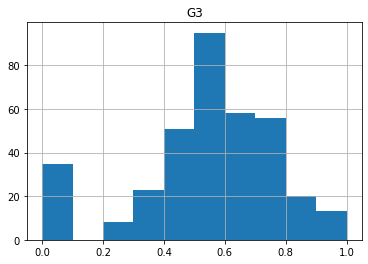

In [20]:
#MinMaxScaler [0,1]


df_norm.hist(column='G3')  

array([[<AxesSubplot:title={'center':'G3'}>]], dtype=object)

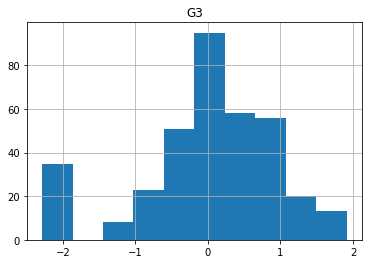

In [21]:
#StandardScaler [by mean]


df_norm1.hist(column='G3') 

array([[<AxesSubplot:title={'center':'G3'}>]], dtype=object)

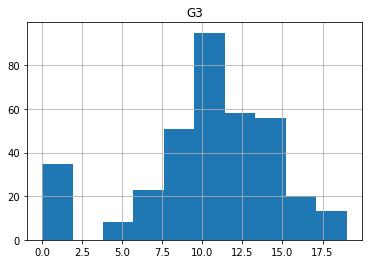

In [22]:
#befor scaling

df.hist(column='G3')

In [48]:
#Extra

#normalizing by converting df to array (pandas to numpy)

from sklearn import preprocessing
x_array = np.array(df['age'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.05660321 0.05660321 0.05974784 0.05031397 0.05345859 0.05660321
  0.04716934 0.05345859 0.05345859 0.04716934 0.04716934 0.05345859
  0.04716934 0.05974784 0.05660321 0.05031397 0.05345859 0.05345859
  0.05031397 0.04716934 0.05031397 0.05660321 0.04716934 0.05974784
  0.05974784 0.05660321 0.05345859 0.05031397 0.05031397 0.05031397
  0.05660321 0.05031397 0.05974784 0.05345859 0.05345859 0.05660321
  0.04716934 0.05345859 0.04716934 0.05031397 0.05345859 0.05660321
  0.05031397 0.05660321 0.05031397 0.05345859 0.05031397 0.04716934
  0.05031397 0.05031397 0.05660321 0.05031397 0.05031397 0.04716934
  0.05031397 0.04716934 0.05031397 0.06289246 0.04716934 0.05345859
  0.05660321 0.05345859 0.05345859 0.04716934 0.05660321 0.05660321
  0.05660321 0.05031397 0.05974784 0.04716934 0.05974784 0.05031397
  0.05660321 0.04716934 0.04716934 0.05031397 0.05031397 0.05660321
  0.05031397 0.05031397 0.05031397 0.05031397 0.05345859 0.05660321
  0.05345859 0.05660321 0.05660321 0.04716934 0.

  
<div class="alert alert-info">
<h1><center><font color=red> Modeling:<font></center></h1>


- 1) from library for evaluation metrics and algorithm
- 2) Modeling step and defining the parameters
- 3) Evaluation by cross validation (pred or score)
- 4) calculation
</div>

In [24]:
#before normalizing:

#Modeling and Evaluation to find the least RMSE 

#A1.

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score                   #from library for evaluation metrics and algorithm
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor(random_state=1234, criterion='mse', max_depth=4) # criterion='mae'      #Modeling step
pred = cross_val_predict(tree, X, Y, cv=5)                                                           #evaluation by cross val step (pred or score)
np.sqrt(mean_squared_error(Y, pred))                                                                #calculate

1.6700439022586904

### After normalizing by Power Transforms, X_g:

In [30]:
#after normalizing

#Modeling and Evaluation to find the least RMSE 

#A1.

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score                   #from library for evaluation metrics and algorithm
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor(random_state=1234, criterion='mse', max_depth=4) # criterion='mae'      #Modeling step
pred = cross_val_predict(tree, X_g, Y, cv=5)    #df_g →gaussian norm.                                                        #evaluation by cross val step (pred or score)
np.sqrt(mean_squared_error(Y, pred))     

1.6700439022586904

## After scaling, X_norm:

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score                   #from library for evaluation metrics and algorithm
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor(random_state=1234, criterion='mse', max_depth=4) # criterion='mae'      #Modeling step
pred = cross_val_predict(tree, X_norm, Y, cv=5)                                                           #evaluation by cross val step (pred or score)
np.sqrt(mean_squared_error(Y, pred))    

1.6700439022586904

In [32]:
#A2.

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=12, hidden_layer_sizes=(10,10), learning_rate_init=0.01, max_iter=500)
pred = cross_val_predict(MLP, X, Y, cv=5)
np.sqrt(mean_squared_error(Y, pred))

1.5643530077269263



## <font color=darkYellow>So, A2 is better than A1? No, because we have to compare the best DecisionTree parameters to the best MLP Parameters<font>

### RMSE: root mean squared error
### RMAE: absolute

In [34]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(KNN, X, Y, cv=5, scoring='neg_mean_squared_error') #Not absolute mean!  #using corss val score instead of predict
#we should use "scoring" parameter in this evaluation in contrast to pred

np.sqrt(-1*scores.mean())

1.9624175617324071

In [35]:
#After normalizing with QuantileTransformer

from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(KNN, X_q, Y, cv=5, scoring='neg_mean_squared_error') #Not absolute mean!  #using corss val score instead of predict
#we should use "scoring" parameter in this evaluation in contrast to pred

np.sqrt(-1*scores.mean())

4.109361612612234

In [36]:
#After normalizing with PowerTransformer 

from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(KNN, X_g, Y, cv=5, scoring='neg_mean_squared_error') #Not absolute mean!  #using corss val score instead of predict
#we should use "scoring" parameter in this evaluation in contrast to pred

np.sqrt(-1*scores.mean())

3.076821987201747

In [37]:
from sklearn.svm import SVR
sv = SVR()
scores = cross_val_score(sv, X, Y, cv=5, scoring='neg_mean_squared_error')
np.sqrt(-1*scores.mean())

2.194788517731992

### Naive-bayes has not regression!

# Best Parameters for any algorithm ↓ by GridSearchCV

In [39]:
# Parameter Tunning  On DecisionTree for example
#Parameters should be mentiond that I want to be fixed like MSE
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeRegressor(random_state=42) #pre-defined→ random state 
par = {'criterion':['mse','mae'],            #Par should be dictionary→ key & value  #parameters of decision tree reg. algorithm
       'max_depth':[3,4,5,6],
      'min_samples_split':[3,4,5,6]}  #if it was classifier→ 'class_weight': {['balanced', {0:0.3, 1:0.7}]
GS = GridSearchCV(tree, param_grid=par, cv=4, scoring='neg_mean_squared_error')  #Cv:→ fold of cross validation 
GS.fit(X, Y)

#Par states ►4*4*4*2 = 128 times decision tree

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [40]:
GS.best_params_  #best parameters for the aforementioned algorithm

{'criterion': 'mse', 'max_depth': 3, 'min_samples_split': 3}

In [41]:
GS.best_score_  #the best result → sqrt= 1.75

-3.2562759975020725

In [42]:
GS.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_split=3, random_state=42)

In [43]:
#assuming that the best model was KNN:

#fitting the best model (the least sqrt) on the whole dataset which was! KNN
KNN.fit(X, Y) 

KNeighborsRegressor(n_neighbors=7)

  
<div class="alert alert-info">
<h1><center><font color=red> Prediction after modeling (by the best model, if it was KNN)<font></center></h1>


</div>

In [44]:
preds = KNN.predict(df_test)
preds

array([ 9.57142857, 11.        ,  0.        ,  4.14285714, 16.28571429,
       11.28571429, 17.14285714, 13.28571429,  8.14285714,  6.28571429,
        9.14285714,  9.14285714, 14.71428571, 10.14285714,  9.        ,
       16.        ,  6.57142857, 17.28571429, 11.42857143, 12.28571429,
       13.42857143, 17.        ,  8.14285714, 12.42857143, 15.28571429,
       16.14285714,  0.        , 10.        , 15.        , 10.14285714,
       18.        , 10.42857143, 15.14285714,  9.85714286,  8.14285714,
        5.14285714])

In [45]:
#Post-processing
preds[preds>20] = 20
preds[preds<0] = 0

In [46]:
#to submit our prediction, we have to save it as csv as we are asket to do.
preds = pd.DataFrame(preds)
preds.to_csv('sub1.csv', index=False, header=None) #without index  and header column